# Mini Project
#### Group 10

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [37]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.dates as mdates
import matplotlib.pylab as plt
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import tkinter as tk

import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas_ta  as ta #pip install pandas-ta


In [38]:
AppleData = pd.read_csv('AAPL.csv')
AppleData['Date'] = pd.to_datetime(AppleData['Date'], format="%m/%d/%Y")
AppleData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [39]:
AppleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10272 non-null  datetime64[ns]
 1   Open       10272 non-null  float64       
 2   High       10272 non-null  float64       
 3   Low        10272 non-null  float64       
 4   Close      10272 non-null  float64       
 5   Adj Close  10272 non-null  float64       
 6   Volume     10272 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 561.9 KB


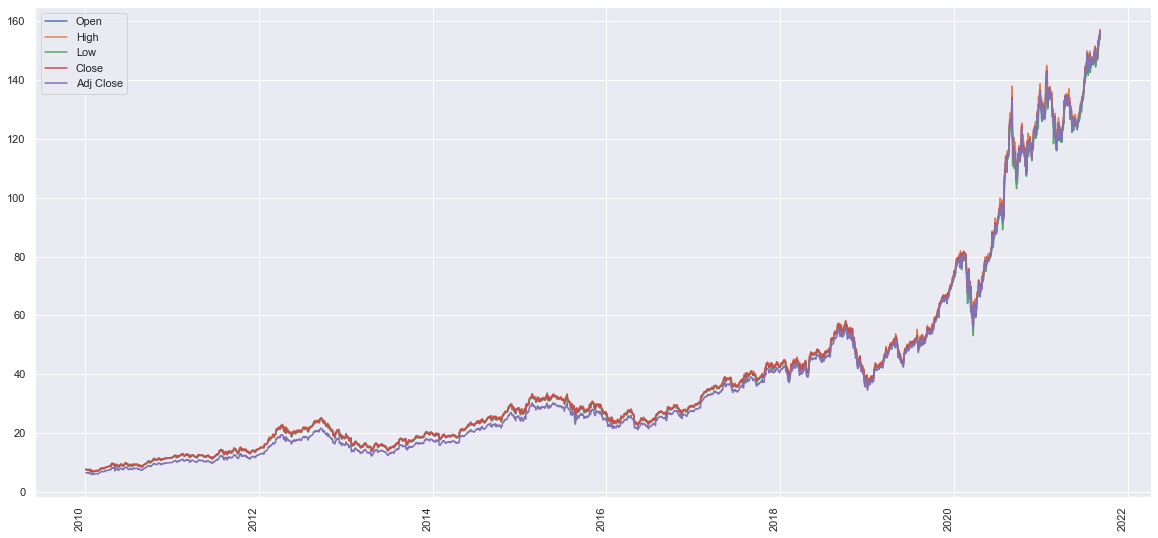

In [40]:
#filter data part
apo = AppleData
AppleData = AppleData[(AppleData['Date'] > '01/01/2010')]

ap = AppleData[["Date","Open","High","Low","Close","Adj Close"]]#.tail(10)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

ap.set_index('Date', inplace = True)
ap.index = pd.to_datetime(ap.index).date
ax = ap.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);


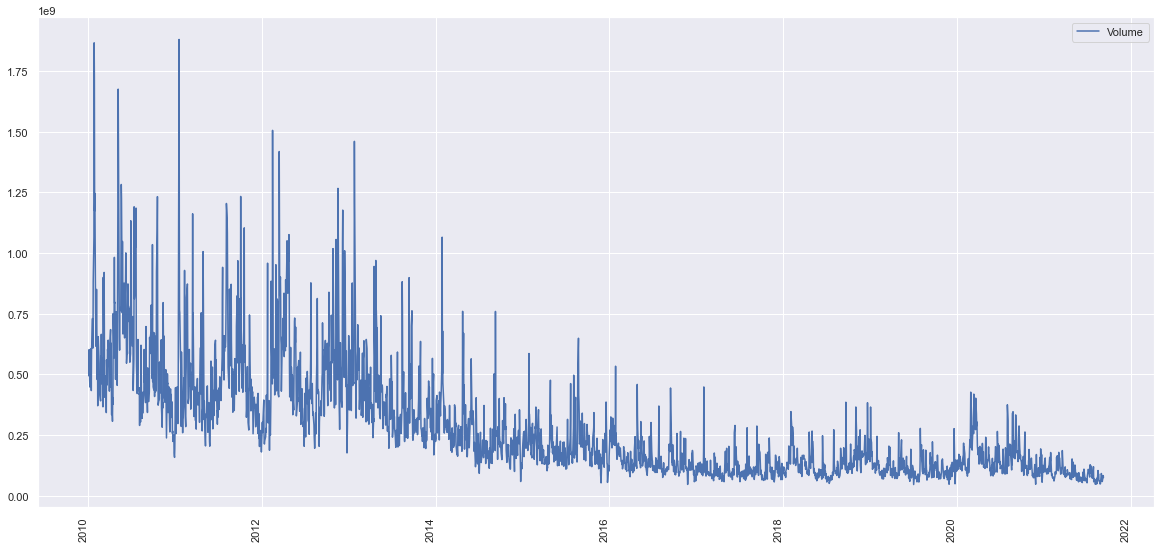

In [41]:
apv = AppleData[["Date","Volume"]]#.tail(100)

#ax = ap.set_index('Date').plot(x_compat=True,figsize=(20, 10))

apv.set_index('Date', inplace = True)
apv.index = pd.to_datetime(apv.index).date
ax = apv.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);

In [44]:
AppleData.corr(method ='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999890,0.999843,0.999739,0.999620,-0.481545
High,0.999890,1.000000,0.999803,0.999864,0.999755,-0.479776
Low,0.999843,0.999803,1.000000,0.999865,0.999746,-0.484592
Close,0.999739,0.999864,0.999865,1.000000,0.999885,-0.482303
Adj Close,0.999620,0.999755,0.999746,0.999885,1.000000,-0.481296
Volume,-0.481545,-0.479776,-0.484592,-0.482303,-0.481296,1.000000


## Getting NewsData

In [45]:
import http.client
import requests
from urllib.request import Request, urlopen
import json

import pandas as pd

from pathlib import Path 

#### Apple News data from 1/1/2013 - 9/8/2019

In [46]:
News_Train = pd.read_csv('AppleNewsStock.csv/APPLNEWS_TRAIN.csv')
News_Train.head()

,published_date,Date,title,link
0,2013-01-01T08:00:00+00:00,1/1/2013,Developers Seeing New Apple iPhone Hardware an...,https://thenextweb.com/news/developers-begin-s...
1,2013-01-02T08:00:00+00:00,1/2/2013,Life After The iPhone: How AT&T's Bet On Apple...,https://www.forbes.com/sites/connieguglielmo/2...
2,2013-01-02T08:00:00+00:00,1/2/2013,Apple's Foray into China - and the Mind of the...,https://knowledge.wharton.upenn.edu/article/ap...
3,2013-01-02T08:00:00+00:00,1/2/2013,Brazen Apple Store Robberies Bracket 2012 - Re...,https://readwrite.com/2013/01/02/brazen-apple-...
4,2013-01-02T08:00:00+00:00,1/2/2013,What needs to happen for Apple to turn its wat...,https://9to5mac.com/2013/01/02/what-needs-to-h...


In [47]:
News_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   published_date  7545 non-null   object
 1   Date            7545 non-null   object
 2   title           7545 non-null   object
 3   link            7545 non-null   object
dtypes: object(4)
memory usage: 235.9+ KB


In [48]:
url = "https://google-news1.p.rapidapi.com/search"

querystring = {"q":"Apple","country":"US","lang":"en","before":"2021-10-10","after":"2021-09-08"}

headers = {
	"X-RapidAPI-Host": "google-news1.p.rapidapi.com",
	"X-RapidAPI-Key": "60ba6c2c8emsha8a15e53ec84acdp14aeb3jsncd684f9e15bd"
}

response = requests.request("GET", url, headers=headers, params=querystring)
x = response.text

In [17]:
data = json.loads(x)
News_Test = pd.json_normalize(data["articles"])
#News_Test.head()

#### Apple News data from 9/8/2021 - 10/8/2021

In [49]:
News_Test = pd.read_csv('AppleNewsStock.csv/APPLNEWS_TEST.csv',encoding='cp1252')
News_Test.head()

,published_date,Date,title,link
0,2021-09-08T07:00:00+00:00,9/8/2021,"New iPhones Are Coming. Apple Stock Is a Buy, ...",https://www.barrons.com/articles/new-iphones-a...
1,2021-09-08T07:00:00+00:00,9/8/2021,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...
2,2021-09-09T07:00:00+00:00,9/9/2021,Apple fires senior engineering program manager...,https://www.theverge.com/2021/9/9/22666049/app...
3,2021-09-09T07:00:00+00:00,9/9/2021,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...
4,2021-09-09T07:00:00+00:00,9/9/2021,Apple Watch Chief Kevin Lynch Now Leading Appl...,https://www.macrumors.com/2021/09/09/kevin-lyn...


### Cleaning News data





In [65]:
d = AppleData
d['rtx'] = d['Adj Close'].pct_change(1).mul(100)

d = pd.concat([d,News_Train], axis=1).reindex(d.index)
#d = pd.concat([d,News_Train], axis=1, join="inner")

d = d[d['title'].str.contains('apple|iphone|ipad', case=False, na=False,regex=True)]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 7331 to 7544
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            204 non-null    datetime64[ns]
 1   Open            204 non-null    float64       
 2   High            204 non-null    float64       
 3   Low             204 non-null    float64       
 4   Close           204 non-null    float64       
 5   Adj Close       204 non-null    float64       
 6   Volume          204 non-null    float64       
 7   rtx             203 non-null    float64       
 8   published_date  204 non-null    object        
 9   Date            204 non-null    object        
 10  title           204 non-null    object        
 11  link            204 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 20.7+ KB


### Classify article with News data

#### Why?

https://www.lehnerinvestments.com/en/sentiment-analysis-stock-market-sentiment/

#### effective?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8053016/

##### with  Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing
https://www.nltk.org/index.html

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20





In [67]:
import nltk #pip install --user -U nltk
#nltk.download('vader_lexicon') #use this one too

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [72]:
pd.options.mode.chained_assignment = None  # default='warn'
d['scores'] = d['title'].apply(lambda News: sid.polarity_scores(News))
d['compound']  = d['scores'].apply(lambda score_dict: score_dict['compound'])
d['comp_score'] = d['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rtx,published_date,Date,title,link,scores,compound,comp_score
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600.0,NaN,2019-07-26T07:00:00+00:00,7/26/2019,Apple's hired contractors are listening to you...,https://www.theverge.com/2019/7/26/8932064/app...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800.0,0.172859,2019-07-26T07:00:00+00:00,7/26/2019,U.S. to deny tariff relief for Apple Mac Pro p...,https://www.reuters.com/article/us-apple-trump...,"{'neg': 0.178, 'neu': 0.593, 'pos': 0.23, 'com...",0.1779,pos
7333,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000.0,-1.590615,2019-07-26T07:00:00+00:00,7/26/2019,Apple could release the Apple Card during the ...,https://techcrunch.com/2019/07/26/apple-could-...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7334,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200.0,-0.184902,2019-07-26T07:00:00+00:00,7/26/2019,Is Apple's Fashion Crown Slipping? - Forbes,https://www.forbes.com/sites/callyrussell/2019...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7336,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.442997,462229600.0,-0.882139,2019-07-27T07:00:00+00:00,7/27/2019,Apple Confirms Striking New iPads Due This Fal...,https://www.forbes.com/sites/davidphelan/2019/...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


## Pred Range News test categorize

In [92]:
#pred range data
pred=pd.read_csv('AAPLTest.csv')
pred['rtx'] = pred['Adj Close'].pct_change(1).mul(100)
pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rtx
0,2021-09-09,155.490005,156.110001,153.949997,154.070007,153.649719,57305700,NaN
1,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.563614,140646400,-3.310195
2,2021-09-13,150.630005,151.419998,148.750000,149.550003,149.142044,102404300,0.389348
3,2021-09-14,150.350006,151.070007,146.910004,148.119995,147.715927,109296300,-0.956214
4,2021-09-15,148.559998,149.440002,146.369995,149.029999,148.623444,83281300,0.614366


In [93]:
pd.options.mode.chained_assignment = None  # default='warn'
News_Test['scores'] = News_Test['title'].apply(lambda News: sid.polarity_scores(News))
News_Test['compound']  = News_Test['scores'].apply(lambda score_dict: score_dict['compound'])
News_Test['comp_score'] = News_Test['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

News_Test#.head()

,published_date,Date,title,link,scores,compound,comp_score
0,2021-09-08T07:00:00+00:00,2021-09-08,"New iPhones Are Coming. Apple Stock Is a Buy, ...",https://www.barrons.com/articles/new-iphones-a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,2021-09-08T07:00:00+00:00,2021-09-08,Apple App Store Changes Fail to Stem Push for ...,https://www.bloomberg.com/news/articles/2021-0...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.5423,neg
2,2021-09-09T07:00:00+00:00,2021-09-09,Apple fires senior engineering program manager...,https://www.theverge.com/2021/9/9/22666049/app...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,2021-09-09T07:00:00+00:00,2021-09-09,Apple may have solved bending batteries for th...,https://appleinsider.com/articles/21/09/09/app...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.2732,pos
4,2021-09-09T07:00:00+00:00,2021-09-09,Apple Watch Chief Kevin Lynch Now Leading Appl...,https://www.macrumors.com/2021/09/09/kevin-lyn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
...,...,...,...,...,...,...,...
94,2021-10-07T07:00:00+00:00,2021-10-07,"Apple promotes Apple Music, Apple Arcade in iO...",https://appleinsider.com/articles/21/10/07/app...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,pos
95,2021-10-07T07:00:00+00:00,2021-10-07,Developers are building ways to skirt Apple's ...,https://www.cnbc.com/2021/10/07/developers-bui...,"{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'comp...",-0.2732,neg
96,2021-10-07T07:00:00+00:00,2021-10-07,Apple posts 'Celebrating Steve' special to You...,https://appleinsider.com/articles/21/10/07/app...,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.7506,pos
97,2021-10-08T20:43:31+00:00,2021-10-08,Apple at Work - Success Stories - Hästens - Apple,https://www.apple.com/business/success-stories...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.5719,pos


In [94]:
#combine data
pred['Date'] = pd.to_datetime(pred.Date)
News_Test['Date'] = pd.to_datetime(News_Test.Date)

#Left join
pred = pred.merge(News_Test, how='left', on='Date')


In [95]:
x_train = pd.DataFrame(d['Adj Close'])
x_test = pd.DataFrame(pred['Adj Close'])
y_train = pd.DataFrame(d['comp_score'])
y_test = pd.DataFrame(pred['comp_score'])

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (204, 1) (204, 1)
Test Set  : (88, 1) (88, 1)


In [96]:
# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)

## Degree 2

[Text(334.8, 543.6, 'Adj Close <= 9.491\ngini = 0.215\nsamples = 204\nvalue = [25, 179]\nclass = Pos'),
 Text(167.4, 326.16, 'Adj Close <= 8.036\ngini = 0.205\nsamples = 198\nvalue = [23, 175]\nclass = Pos'),
 Text(83.7, 108.72000000000003, 'gini = 0.239\nsamples = 144\nvalue = [20, 124]\nclass = Pos'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.105\nsamples = 54\nvalue = [3, 51]\nclass = Pos'),
 Text(502.20000000000005, 326.16, 'Adj Close <= 9.587\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Pos'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Neg'),
 Text(585.9, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Pos')]

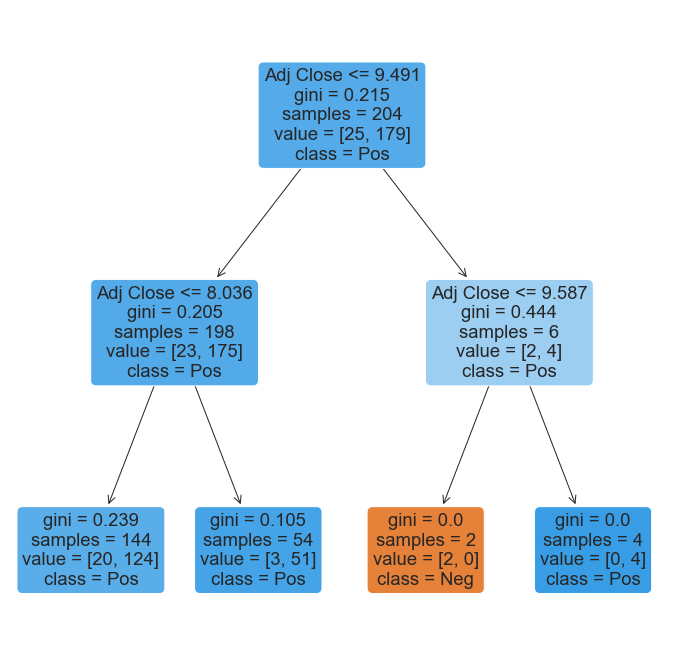

In [97]:
dectree2.fit(x_train,y_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Adj Close"], 
          class_names=["Neg","Pos"])

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8872549019607843

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8068181818181818

Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  0.92
Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0


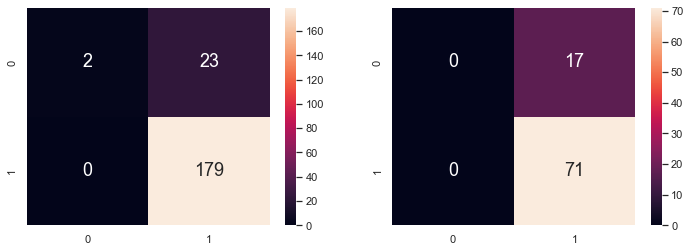

In [98]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree2.predict(x_train)
y_test_pred = dectree2.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

## Degree 4

[Text(837.0000000000001, 1174.1760000000002, 'Adj Close <= 9.491\ngini = 0.215\nsamples = 204\nvalue = [25, 179]\nclass = Pos'),
 Text(558.0, 913.248, 'Adj Close <= 8.036\ngini = 0.205\nsamples = 198\nvalue = [23, 175]\nclass = Pos'),
 Text(334.8, 652.3200000000002, 'Adj Close <= 8.034\ngini = 0.239\nsamples = 144\nvalue = [20, 124]\nclass = Pos'),
 Text(223.20000000000002, 391.39200000000005, 'Adj Close <= 6.644\ngini = 0.23\nsamples = 143\nvalue = [19, 124]\nclass = Pos'),
 Text(111.60000000000001, 130.46400000000017, 'gini = 0.097\nsamples = 39\nvalue = [2, 37]\nclass = Pos'),
 Text(334.8, 130.46400000000017, 'gini = 0.273\nsamples = 104\nvalue = [17, 87]\nclass = Pos'),
 Text(446.40000000000003, 391.39200000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Neg'),
 Text(781.2, 652.3200000000002, 'Adj Close <= 8.401\ngini = 0.105\nsamples = 54\nvalue = [3, 51]\nclass = Pos'),
 Text(669.6, 391.39200000000005, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = Pos'),
 Text(892

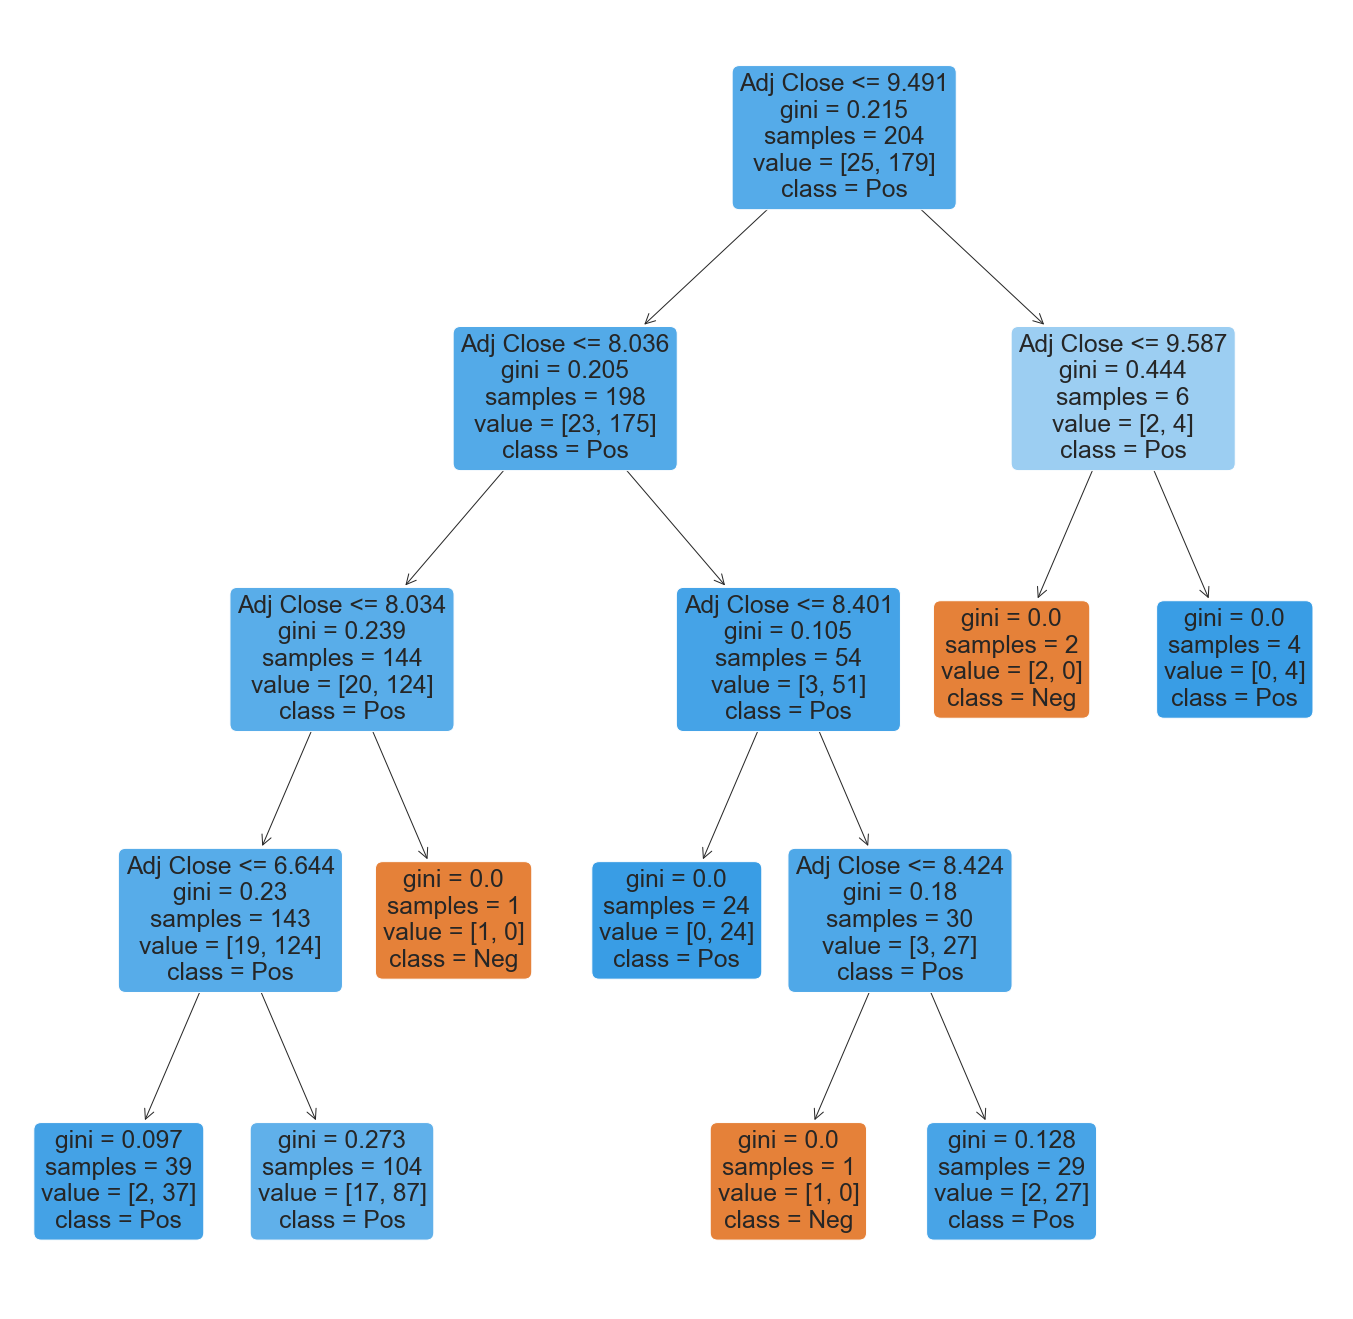

In [99]:
dectree4.fit(x_train,y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["Adj Close"], 
          class_names=["Neg","Pos"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8872549019607843

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8068181818181818

Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  0.84
Train set
True Positive Rate 	:  1.0
False Positive Rate 	:  1.0


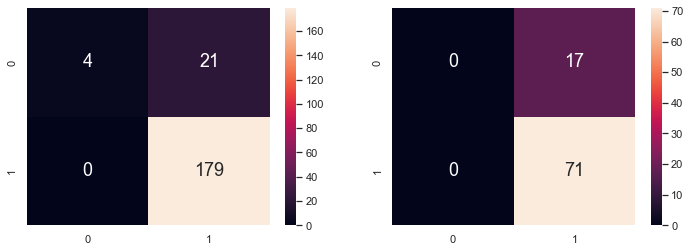

In [100]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree4.predict(x_train)
y_test_pred = dectree4.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cftr = confusion_matrix(y_train, y_train_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

cftr = confusion_matrix(y_test, y_test_pred)
tp = cftr[1][1] / (cftr[1][1] + cftr[1][0])
fp = cftr[0][1] / (cftr[0][1] + cftr[0][0])
print("Train set")
print("True Positive Rate \t: ", tp)
print("False Positive Rate \t: ", fp)

## Full Data (Ignore this)

Ignore This 

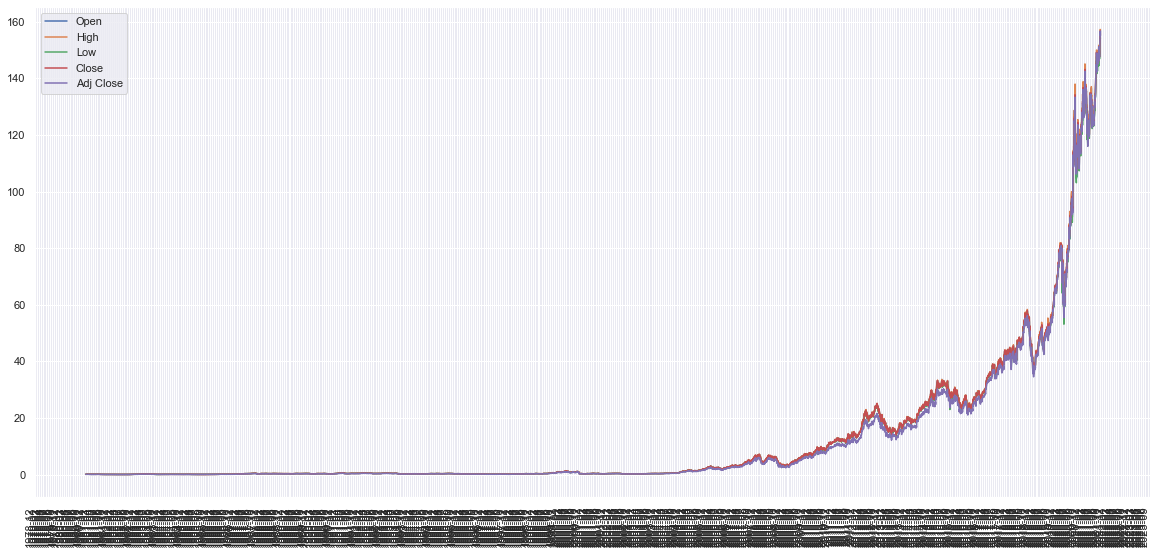

In [169]:
apo1 = apo[["Date","Open","High","Low","Close","Adj Close"]]

apo1.set_index('Date', inplace = True)
apo1.index = pd.to_datetime(apo1.index).date
ax = apo1.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks(rotation=90);

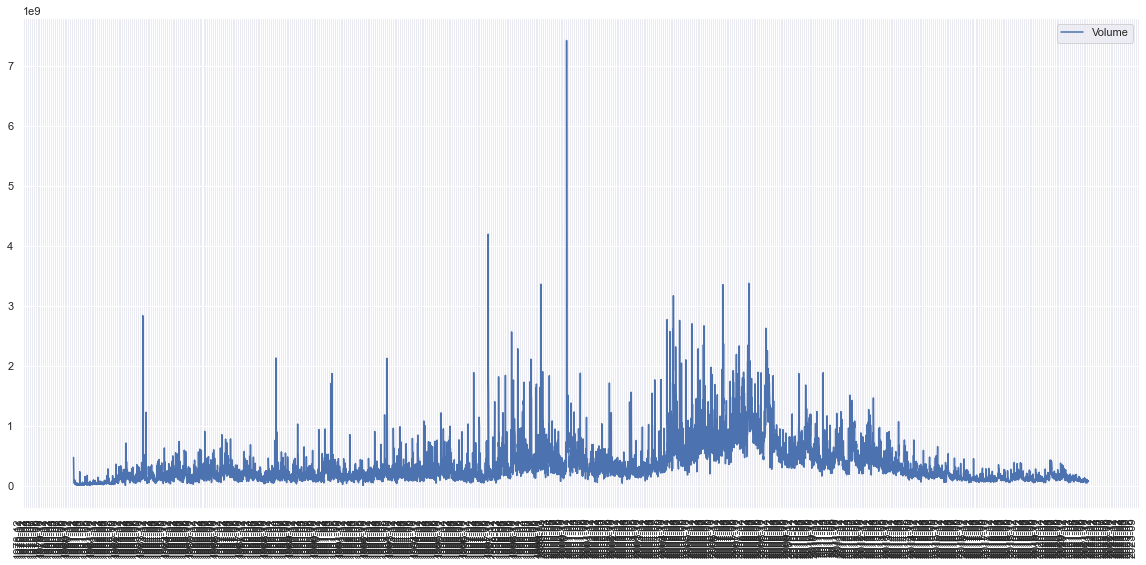

In [145]:
apo2 = apo[["Date","Volume"]]

apo2.set_index('Date', inplace = True)
apo2.index = pd.to_datetime(apo2.index).date
ax = apo2.plot(figsize=(20, 10))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90);